# Setting up a basic EasyVVUQ-Fabsim3 campaign

We will assume you have executed the basic EasyVVUQ assigment of day 2. Here, we will do the same, except we will **use FabSim3 to execute the ensembles, instead of the EasyVVUQ `ExecuteLocal` class**. As before, we will quantify the uncertainties of our simple advection-diffusion model:

\begin{align*}
\boxed{
\frac{du}{dx} - \frac{1}{Pe}\frac{d^2u}{dx^2} = f}
\end{align*}

This ODE solves for the velocity $u(x)$, where the spatial domain runs from $x\in[0,1]$. Homogeneous boundary conditions are applied: $u(0)=u(1)=0$. The solution $u$ depends upon two parameters:

* $Pe$: the so-called **Peclet number**, defined as the ratio between the rate of advection and the rate of diffusion,
* $f$: the constant forcing term.

A numerical solver (finite elements) of this equation is found in `advection_diffusion_model/advection_diffusion.py`.

In [1]:
#!pip install easyvvuq
#!pip install matplotlib

In [24]:
import os
import numpy as np
import matplotlib.pyplot as plt

import chaospy as cp
import easyvvuq as uq
from easyvvuq.actions import CreateRunDirectory, Encode, Decode, ExecuteLocal, Actions

### Flags

In [4]:
# home directory
HOME = os.getcwd()
# Work directory, where the easyVVUQ directory will be placed
WORK_DIR = '/tmp'
# EasyVVUQ Campaign name
CAMPAIGN_NAME = 'adv_diff'

### Define paramater space

In [6]:
# Define parameter space
params = {
    "Pe": {
        "type": "float",
        "default": 100.0},
    "f": {
        "type": "float",
        "default": 1.0}}

### Choose input distributions

In [8]:
vary = {'Pe' : cp.Uniform(90, 110),
        'f' : cp.Uniform(0.9, 1.1)}

### Input file encoding

In [9]:
encoder = uq.encoders.GenericEncoder(template_fname='advection_diffusion_model/input.template',
                                     delimiter='$',
                                     target_filename='input.json')

### Local ensemble execution

In [10]:
execute = ExecuteLocal('python {}/advection_diffusion_model/advection_diffusion.py'.format(HOME))

### Output file decoding

In [11]:
decoder = uq.decoders.SimpleCSV(target_filename='output.csv', 
                                output_columns=['u'])

### Actions: creating a sequence of steps

In [12]:
actions = Actions(CreateRunDirectory(WORK_DIR, flatten=True),
                  Encode(encoder), 
                  execute,
                  Decode(decoder))

### Campaign: putting everything together

In [13]:
campaign = uq.Campaign(work_dir=WORK_DIR, name=CAMPAIGN_NAME,
                       params=params, actions=actions)

### Selecting a sampling method

In [14]:
sampler = uq.sampling.PCESampler(vary=vary, polynomial_order=3)
campaign.set_sampler(sampler)

### Executing the actions

In [15]:
campaign.execute().collate()


-----/tmp/adv_diff24o05k6y/runs/run_3
Solving advection diffusion equation at Pe = 91.4 and f = 1.0
-----/tmp/adv_diff24o05k6y/runs/run_2
Solving advection diffusion equation at Pe = 91.4 and f = 1.0
-----/tmp/adv_diff24o05k6y/runs/run_9
Solving advection diffusion equation at Pe = 103.4 and f = 0.9
-----/tmp/adv_diff24o05k6y/runs/run_1
Solving advection diffusion equation at Pe = 91.4 and f = 0.9
-----/tmp/adv_diff24o05k6y/runs/run_4
Solving advection diffusion equation at Pe = 91.4 and f = 1.1
-----/tmp/adv_diff24o05k6y/runs/run_10
Solving advection diffusion equation at Pe = 103.4 and f = 1.0
-----/tmp/adv_diff24o05k6y/runs/run_5
Solving advection diffusion equation at Pe = 96.6 and f = 0.9
-----/tmp/adv_diff24o05k6y/runs/run_7
Solving advection diffusion equation at Pe = 96.6 and f = 1.0
-----/tmp/adv_diff24o05k6y/runs/run_11
Solving advection diffusion equation at Pe = 103.4 and f = 1.0
-----/tmp/adv_diff24o05k6y/runs/run_8
Solving advection diffusion equation at Pe = 96.6 and f =

### Retrieving the raw results

In [16]:
df = campaign.get_collation_result()
df

run_id iteration          Pe         f             u                      \
      0         0           0         0             0         1         2     
0       1         0   91.388637  0.913886  8.508097e-14  0.002285  0.004569   
1       2         0   91.388637  0.966002  1.038570e-13  0.002415  0.004830   
2       3         0   91.388637  1.033998  9.905040e-14  0.002585  0.005170   
3       4         0   91.388637  1.086114  1.062685e-13  0.002715  0.005431   
4       5         0   96.600190  0.913886  6.126804e-15  0.002285  0.004569   
5       6         0   96.600190  0.966002  3.435850e-15  0.002415  0.004830   
6       7         0   96.600190  1.033998  6.409849e-15  0.002585  0.005170   
7       8         0   96.600190  1.086114  5.013566e-15  0.002715  0.005431   
8       9         0  103.399810  0.913886  2.924776e-15  0.002285  0.004569   
9      10         0  103.399810  0.966002 -1.017045e-14  0.002415  0.004830   
10     11         0  103.399810  1.033998 -6.683465e-15  0.002585  0.005170   
11     12         0  103.399810  1.086114 -4.726230e-15  0.002715  0.005431   
12     13         0  108.611363  0.913886  7.238734e-15  0.002285  0.004569   
13     14         0  108.611363  0.966002 -8.897363e-16  0.002415  0.004830   
14     15         0  108.611363  1.033998  8.454188e-15  0.002585  0.005170   
15     16         0  108.611363  1.086114  3.336393e-15  0.002715  0.005431   

                                  ...                                          \
         3         4         5    ...       391       392       393       394   
0   0.006854  0.009139  0.011424  ...  0.777456  0.749855  0.714544  0.669536   
1   0.007245  0.009660  0.012075  ...  0.821792  0.792616  0.755292  0.707717   
2   0.007755  0.010340  0.012925  ...  0.879637  0.848408  0.808456  0.757533   
3   0.008146  0.010861  0.013576  ...  0.923973  0.891169  0.849204  0.795714   
4   0.006854  0.009139  0.011424  ...  0.790446  0.764473  0.730740  0.687113   
5   0.007245  0.009660  0.012075  ...  0.835522  0.808068  0.772411  0.726296   
6   0.007755  0.010340  0.012925  ...  0.894334  0.864948  0.826780  0.777420   
7   0.008146  0.010861  0.013576  ...  0.939410  0.908543  0.868452  0.816603   
8   0.006854  0.009139  0.011424  ...  0.805255  0.781394  0.749772  0.708084   
9   0.007245  0.009660  0.012075  ...  0.851175  0.825954  0.792529  0.748463   
10  0.007755  0.010340  0.012925  ...  0.911089  0.884093  0.848314  0.801147   
11  0.008146  0.010861  0.013576  ...  0.957010  0.928653  0.891071  0.841527   
12  0.006854  0.009139  0.011424  ...  0.815163  0.792891  0.762904  0.722777   
13  0.007245  0.009660  0.012075  ...  0.861649  0.838107  0.806409  0.763994   
14  0.007755  0.010340  0.012925  ...  0.922300  0.897100  0.863172  0.817771   
15  0.008146  0.010861  0.013576  ...  0.968785  0.942316  0.906677  0.858988   

                                                           
         395       396       397       398       399  400  
0   0.612330  0.539778  0.447924  0.331787  0.185106  0.0  
1   0.647249  0.570560  0.473467  0.350708  0.195662  0.0  
2   0.692808  0.610721  0.506794  0.375394  0.209434  0.0  
3   0.727727  0.641503  0.532338  0.394315  0.219990  0.0  
4   0.630876  0.558564  0.465764  0.346847  0.194641  0.0  
5   0.666852  0.590417  0.492325  0.366627  0.205740  0.0  
6   0.713791  0.631976  0.526979  0.392433  0.220222  0.0  
7   0.749768  0.663829  0.553540  0.412213  0.231322  0.0  
8   0.653342  0.581670  0.488043  0.365942  0.206915  0.0  
9   0.690600  0.614841  0.515874  0.386811  0.218715  0.0  
10  0.739210  0.658119  0.552186  0.414038  0.234110  0.0  
11  0.776468  0.691289  0.580017  0.434906  0.245910  0.0  
12  0.669325  0.598362  0.504385  0.380165  0.216199  0.0  
13  0.707494  0.632484  0.533148  0.401844  0.228528  0.0  
14  0.757294  0.677004  0.570676  0.430130  0.244614  0.0  
15  0.795463  0.711127  0.599440  0.451809  0.256943  0.0  

[16 rows x 405 columns]

### Analysis: postprocessing the results

In [19]:
results = campaign.analyse(qoi_cols=['u'])
results.supported_stats()

/home/wouter/.local/lib/python3.9/site-packages/chaospy-4.3.2-py3.9.egg/chaospy/descriptives/correlation/pearson.py:46: RuntimeWarning: invalid value encountered in divide
  return numpy.where(vvar > 0, cov/vvar, 0)


Error LinAlgError for u when computing cp.QoI_Dist()


['min', 'max', '10%', '90%', '1%', '99%', 'median', 'mean', 'var', 'std']

### Plotting moments

In [22]:
code_samples = results.samples['u'].values
xx = np.linspace(0, 1, code_samples.shape[1])

/tmp/ipykernel_10461/3819871877.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


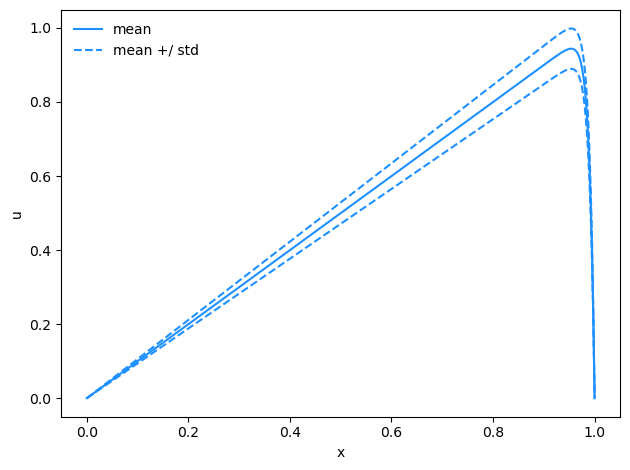

In [26]:
mean = results.describe(qoi = 'u', statistic = 'mean')
std = results.describe(qoi = 'u', statistic = 'std')

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='x', ylabel = 'u')
ax.plot(xx, mean, color='dodgerblue', label='mean')
ax.plot(xx, mean + std, '--', color='dodgerblue', label='mean +/ std')
ax.plot(xx, mean - std, '--', color='dodgerblue')
plt.legend(frameon = False)
plt.tight_layout()
plt.tight_layout()

### Fast sampling using the surrogate

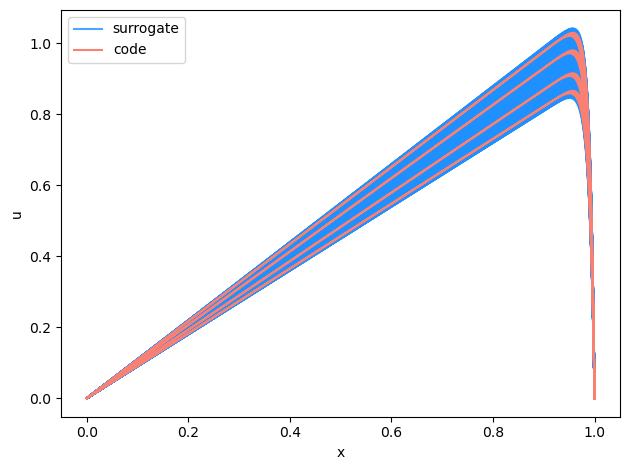

In [28]:
surrogate = results.surrogate()

random_inputs = {}
n_samples = 1000
for param in vary.keys():
    random_inputs[param] = vary[param].sample(n_samples)

u_surrogate = surrogate(random_inputs)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='x', ylabel = 'u')
ax.plot(xx, np.array(u_surrogate['u']).T, color='dodgerblue', alpha=0.8, label='surrogate')
ax.plot(xx, code_samples.T, color='salmon', label='code')

# legend, but remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()

### Plotting the Sobol indices

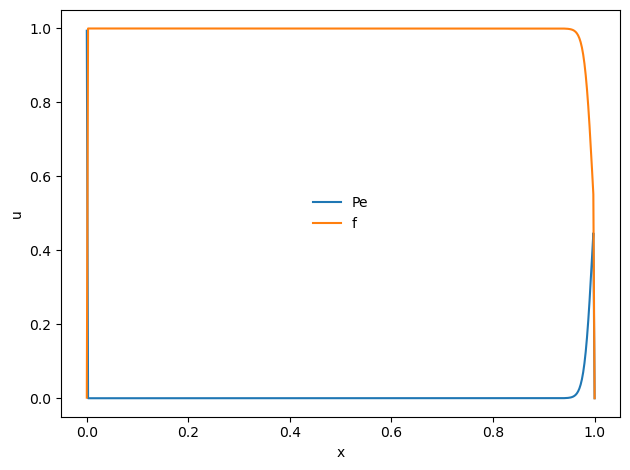

In [30]:
sobols_first = results.sobols_first()

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='x', ylabel = 'u')

for param in vary:
    ax.plot(xx, sobols_first['u'][param], label=param)

plt.legend(frameon = False)
plt.tight_layout()